 Q-1:  Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function

In [13]:
import yfinance as yf
tesla = yf.Ticker('TSLA')
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


 Q-2:  Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function.

In [5]:

import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Extract Tesla stock data using yfinance
tesla = yf.Ticker('TSLA')
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# Display the first five rows of tesla_data
print(tesla_data.head())

# Step 2: Web scraping to extract Tesla revenue data
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find the revenue table by looking for the specific table with Tesla revenue data
revenue_table = None
tables = soup.find_all('table')
for table in tables:
    if 'Tesla Quarterly Revenue' in str(table):
        revenue_table = table
        break

# Check if the revenue table is found
if revenue_table:
    # Convert the table to a DataFrame
    revenue_data = []
    rows = revenue_table.find_all('tr')
    for row in rows[1:]:  # Skip the header row
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]
        revenue_data.append(cols)

    # Create a DataFrame
    tesla_revenue = pd.DataFrame(revenue_data, columns=['Date', 'Revenue'])

    # Convert the 'Revenue' column to numeric, removing any commas and dollar signs
    tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '').astype(float)

    # Display the last five rows of tesla_revenue
    print(tesla_revenue.tail())
else:
    print("Revenue table not found.")


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  
Revenue table not found.


Q-3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function

In [6]:

import yfinance as yf

# Extract GameStop (GME) stock data
gme = yf.Ticker('GME')
gme_data = gme.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows of gme_data
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670625  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603295  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


Q-4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function

In [16]:

import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Web scraping to extract GME revenue data
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find the revenue table by looking for the specific table with GME revenue data
revenue_table = None
tables = soup.find_all('table')
for table in tables:
    if 'GameStop Quarterly Revenue' in str(table):
        revenue_table = table
        break

# Check if the revenue table is found
if revenue_table:
    # Convert the table to a DataFrame
    revenue_data = []
    rows = revenue_table.find_all('tr')
    for row in rows[1:]:  # Skip the header row
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]
        revenue_data.append(cols)

    # Create a DataFrame
    gme_revenue = pd.DataFrame(revenue_data, columns=['Date', 'Revenue'])

    # Convert the 'Revenue' column to numeric, removing any commas and dollar signs
    gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '').str.replace('$', '').astype(float)

    # Display the last five rows of gme_revenue
    print(gme_revenue.tail())
else:
    print("Revenue table not found.")


Revenue table not found.


In [ ]:
Q-5: Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

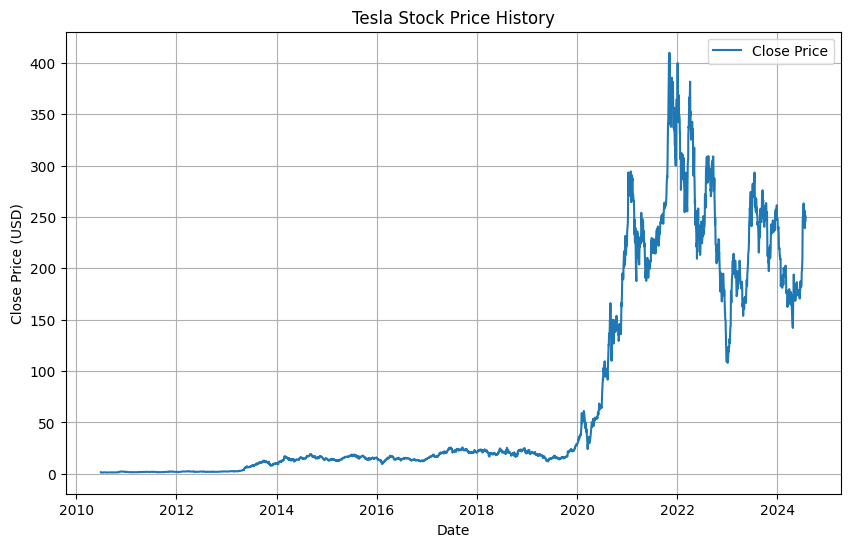

In [10]:

import matplotlib.pyplot as plt
import yfinance as yf

# Step 1: Extract Tesla stock data using yfinance
tesla = yf.Ticker('TSLA')
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# Step 2: Define the make_graph function
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 3: Plot the Tesla stock data
make_graph(tesla_data, 'Tesla Stock Price History')


Q-6: Plot GameStop Stock Graph

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

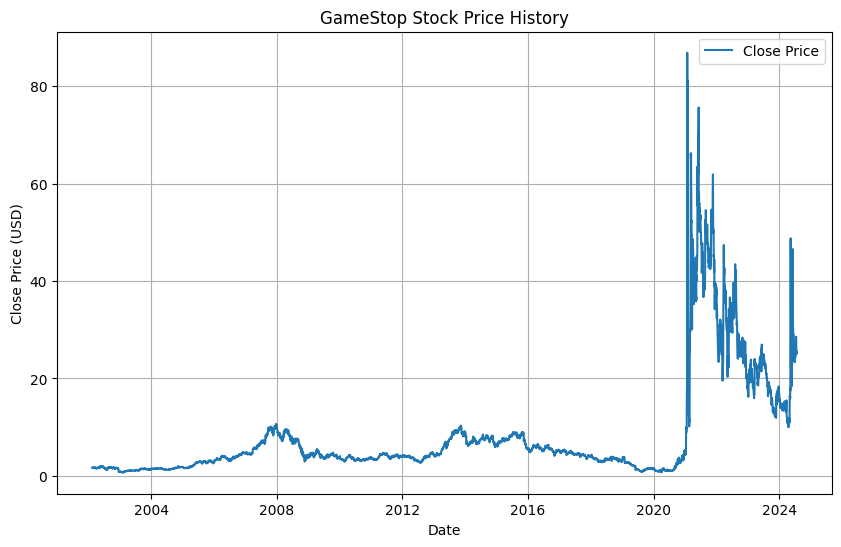

In [11]:

import matplotlib.pyplot as plt
import yfinance as yf

# Step 1: Extract GameStop stock data using yfinance
gme = yf.Ticker('GME')
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

# Step 2: Define the make_graph function (if not already defined)
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 3: Plot the GameStop stock data
make_graph(gme_data, 'GameStop Stock Price History')
